In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
columns = ['id', 'thickness', 'uniform_size', 'uniform_shape', 'marginal_adhesion', 'SEC_size', 
           'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
bc_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=columns)
bc_df.head()

,id,thickness,uniform_size,uniform_shape,marginal_adhesion,SEC_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [50]:
bc_df.shape

(699, 11)

In [51]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
thickness            699 non-null int64
uniform_size         699 non-null int64
uniform_shape        699 non-null int64
marginal_adhesion    699 non-null int64
SEC_size             699 non-null int64
bare_nuclei          699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [52]:
bc_df = bc_df.drop('id', axis=1)

In [53]:
bc_df['class'] = bc_df['class'].apply(lambda x : 0 if x==2 else 1)

In [54]:
bc_df = bc_df.dropna(how='all', axis=0)

In [55]:
# finding misc values
for col in bc_df.columns:
    print(bc_df[col].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[0 1]


In [56]:
# find the column which contains string values and '?'
df_preprocessing.columns[5]

'bare_nuclei'

In [57]:
# convert the missing bare_nuclei to the mean value

# convert argument to numeric type
bc_df = bc_df.apply(pd.to_numeric, errors='coerce')
# find mean and round it to nearest value
mean_bare_nuclei = round(bc_df['bare_nuclei'].mean())
# fill missing values with mean
bc_df['bare_nuclei'].fillna(value=mean_bare_nuclei, inplace=True)
# cast to integer dtype
bc_df = bc_df.apply(pd.to_numeric, errors='coerce', downcast='integer')

In [58]:
bc_df.describe()

,thickness,uniform_size,uniform_shape,marginal_adhesion,SEC_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.555079,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602496,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac22d386a0>,
      dtype=object)

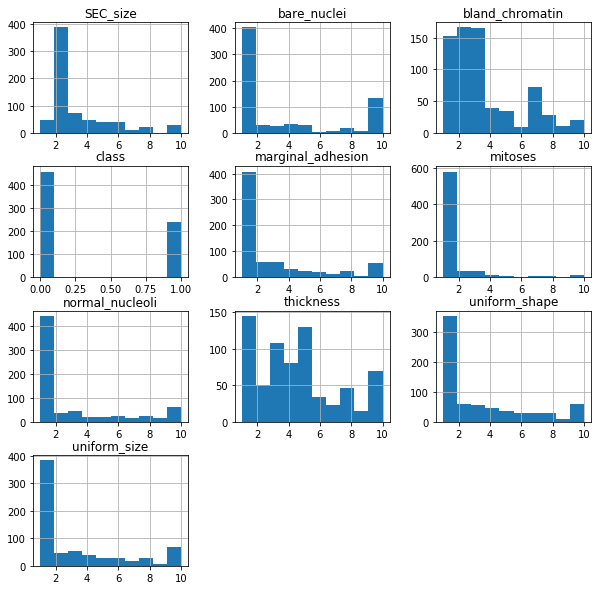

In [60]:
bc_df.hist(figsize=(10,10))

thickness                AxesSubplot(0.125,0.71587;0.227941x0.16413)
uniform_size          AxesSubplot(0.398529,0.71587;0.227941x0.16413)
uniform_shape         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
marginal_adhesion       AxesSubplot(0.125,0.518913;0.227941x0.16413)
SEC_size             AxesSubplot(0.398529,0.518913;0.227941x0.16413)
bare_nuclei          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
bland_chromatin         AxesSubplot(0.125,0.321957;0.227941x0.16413)
normal_nucleoli      AxesSubplot(0.398529,0.321957;0.227941x0.16413)
mitoses              AxesSubplot(0.672059,0.321957;0.227941x0.16413)
class                      AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

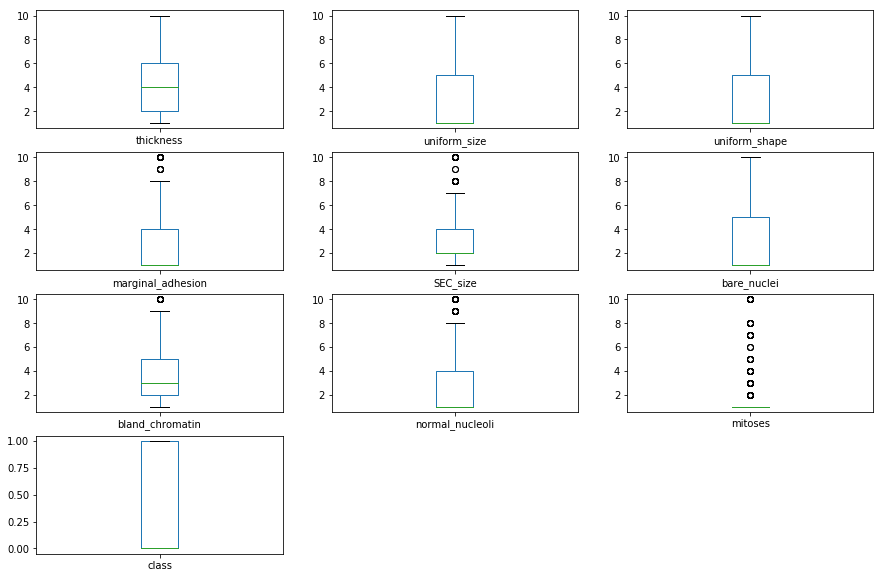

In [67]:
bc_df.plot(kind= 'box', subplots=True, layout=(4,3), sharex=False, figsize=(15,10))

In [69]:
corr = bc_df.corr()

Text(0.5,1,'Correlation Matrix of Breast Cancer Dataset')

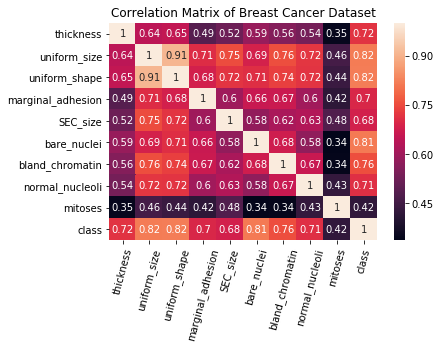

In [75]:
ax = sns.heatmap(corr, annot = True)
plt.setp(ax.axes.get_xticklabels(), rotation=75)
plt.title('Correlation Matrix of Breast Cancer Dataset')

In [76]:
from sklearn.decomposition import PCA

In [77]:
y = bc_df['class']
bc_df = bc_df.drop('class', axis=1)
X = bc_df

In [78]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

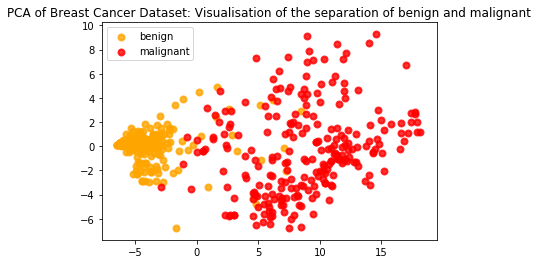

In [85]:
plt.figure()
colors = ['orange', 'red']
lw = 2
for color, i, target_name in zip(colors, [0, 1], ['benign','malignant']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.title('PCA of Breast Cancer Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [87]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV  

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))

Training set size:  559
Test set size:  140


In [91]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_leaf=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [92]:
params = {"max_depth": np.arange(1,20)}
grid = GridSearchCV(dt, params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
grid.best_params_

{'max_depth': 3}

In [94]:
from sklearn import tree
from IPython.display import Image
import pydotplus

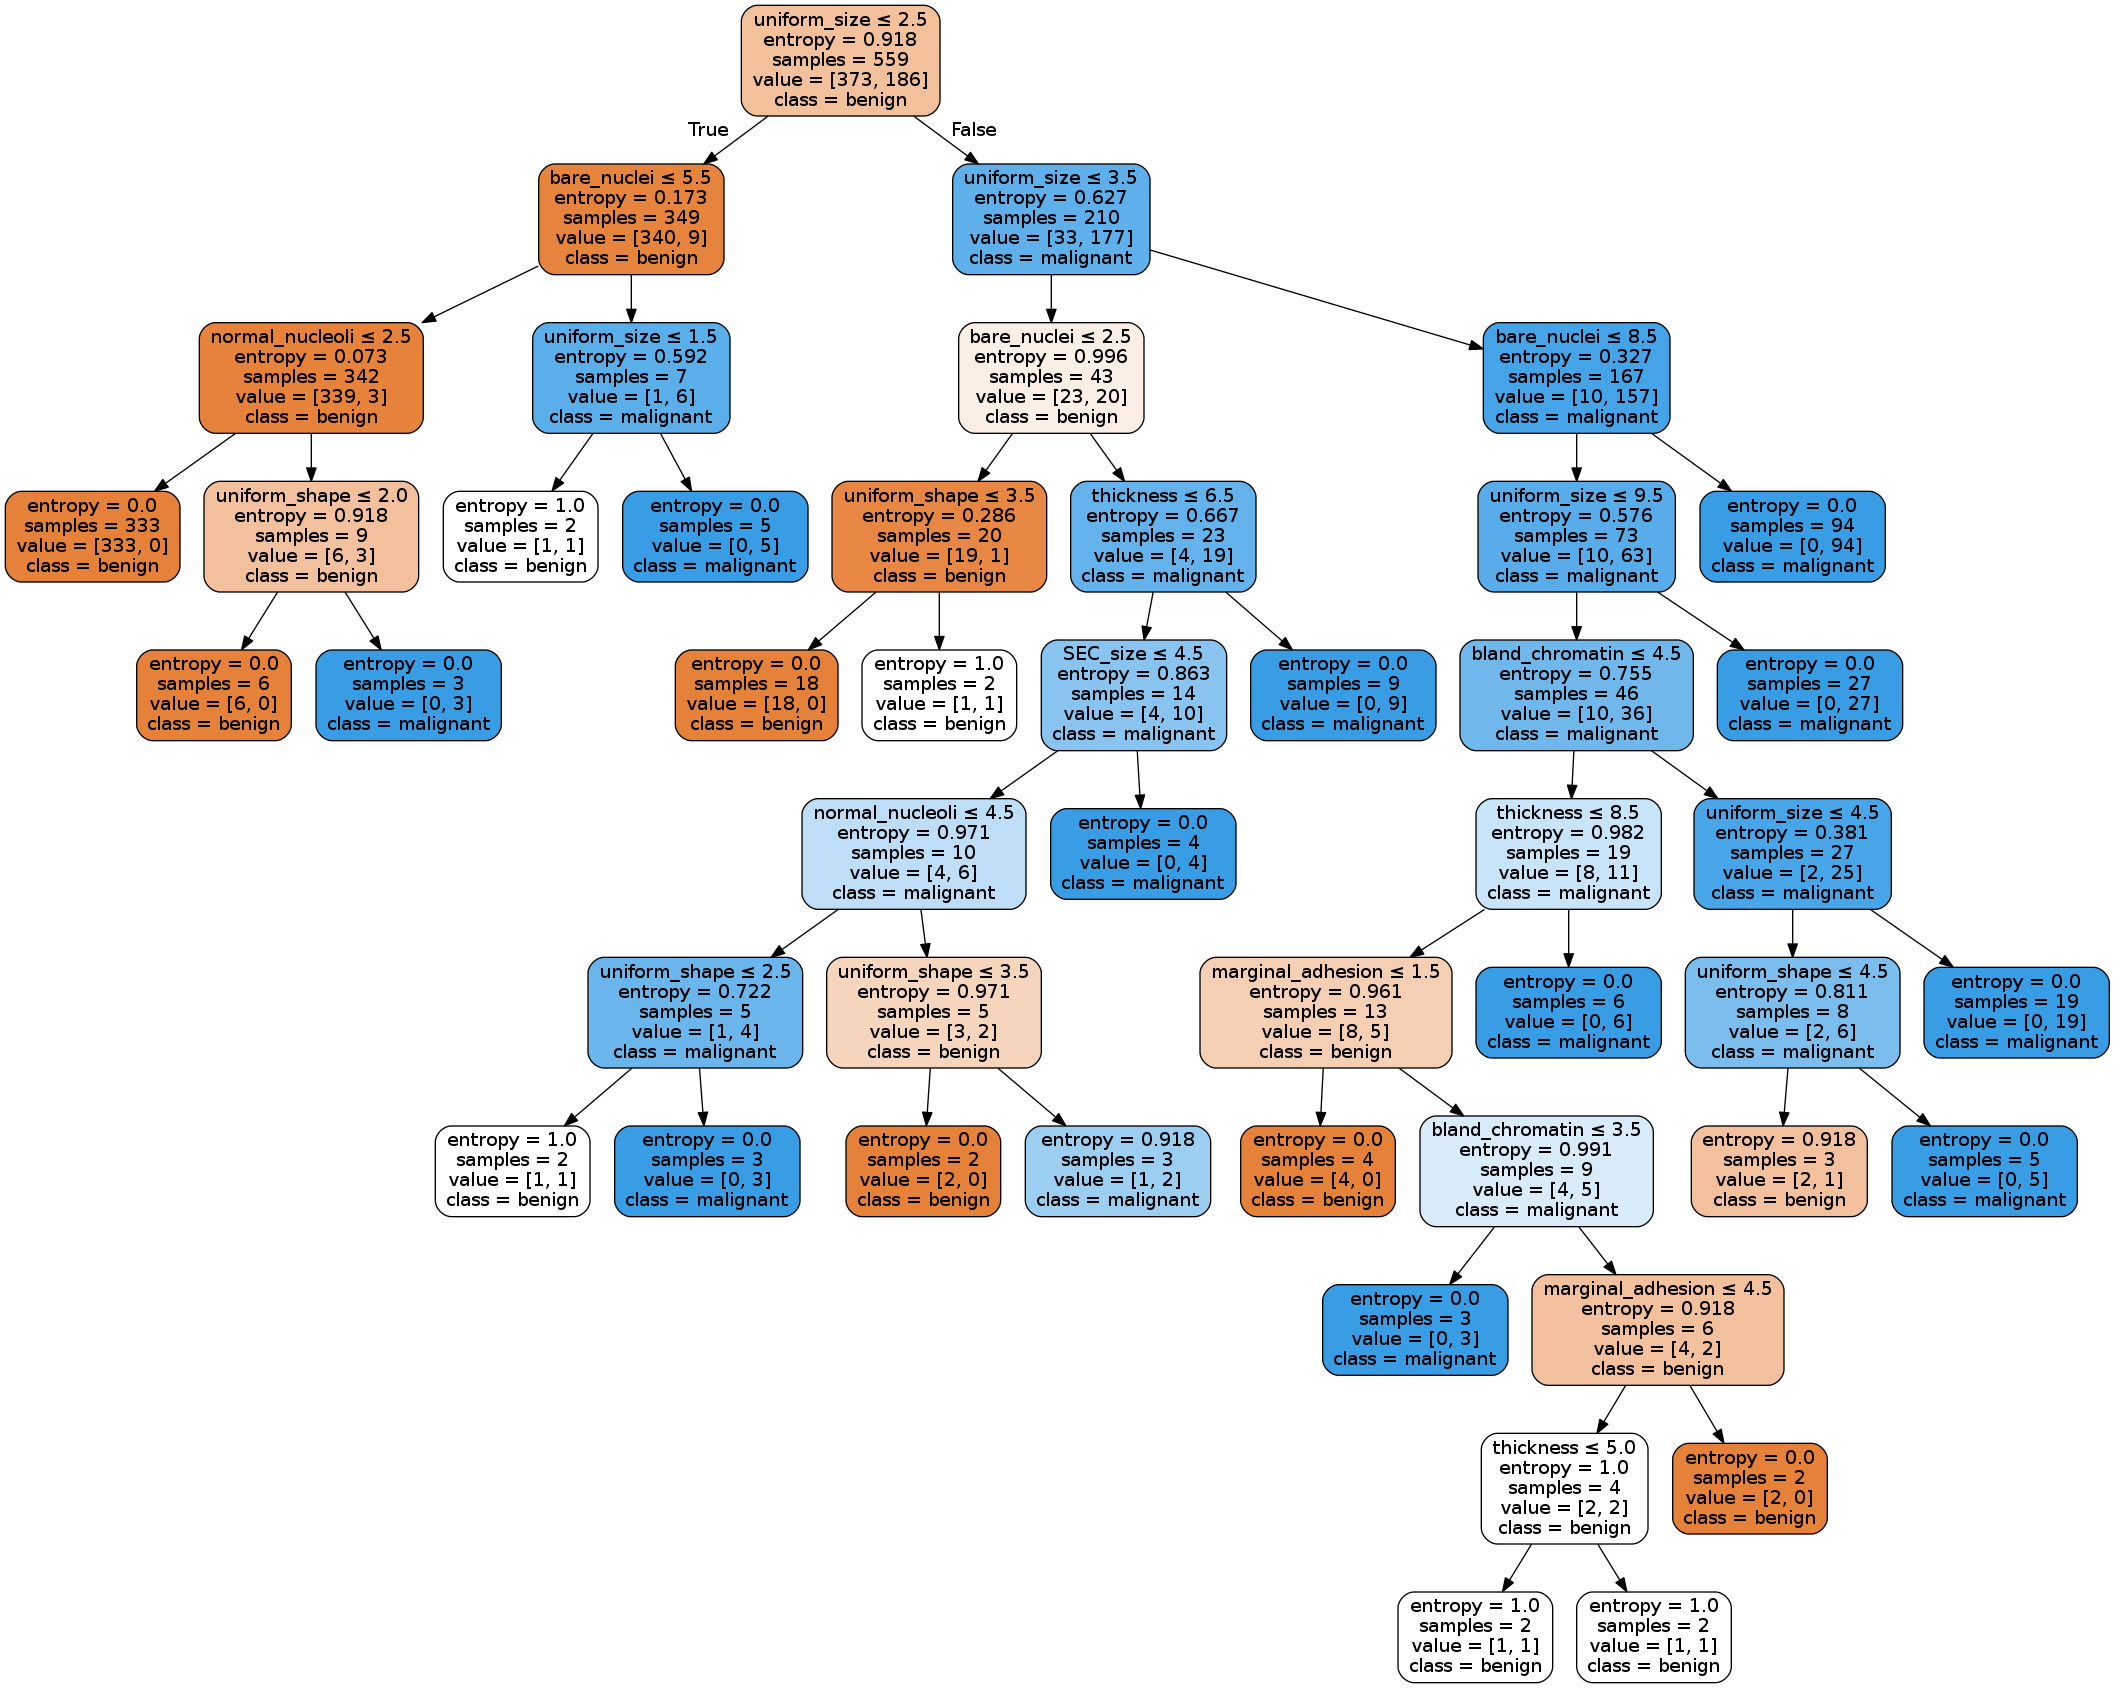

In [97]:
dot_data = tree.export_graphviz(dt, out_file = None, feature_names=X.columns, class_names=['benign', 'malignant'], 
                filled=True, rounded=True, special_characters=True) 
dtree = pydotplus.graph_from_dot_data(dot_data)
Image(dtree.create_png())

In [103]:
from sklearn.metrics import accuracy_score

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

print("Training set acc.: ", accuracy_score(y_train, y_pred_train))
print("Test set acc.: ", accuracy_score(y_test, y_pred_test))

Training set acc.:  0.9660107334525939
Test set acc.:  0.95


In [104]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test, dt_predict_test)

array([[81,  4],
       [ 3, 52]])

In [110]:
import itertools

In [111]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

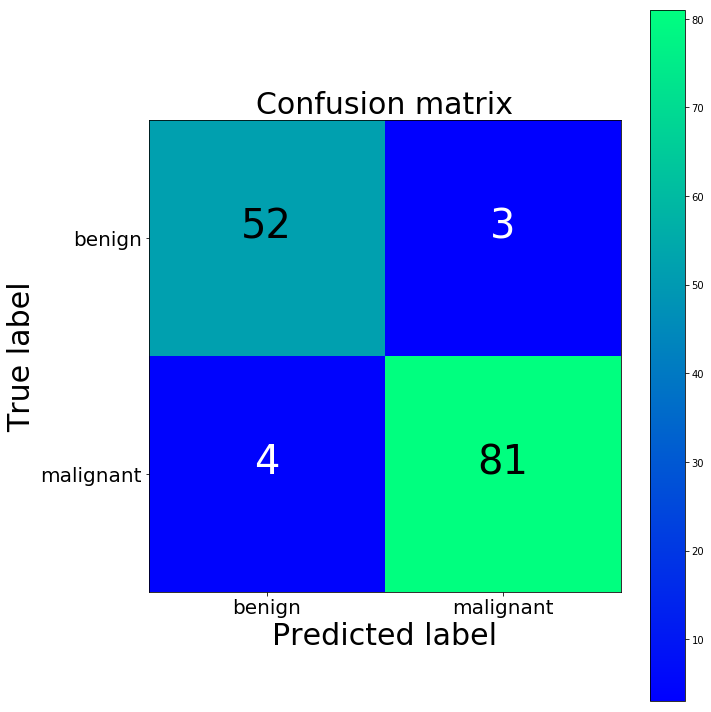

In [112]:
cm = metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['benign','malignant'], normalize=False, title='Confusion matrix')
plt.show()